There are not too many fields in finance that really benefit from visualization in three dimensions. However, one application area is volatility surfaces showing implied vol‐ atilities simultaneously for a number of times-to-maturity and strikes of the traded options used. See also Appendix B for an example of value and vega surfaces being visualized for a European call option. In what follows, the code artificially generates a plot that resembles a volatility surface. To this end, consider the parameters:

1. <i><b>Strike values</b></i> between 50 and 150.
Strike prices are established when a contract is first written. <u>It tells the investor what price the underlying asset must reach before the option is in-the-money</u> (ITM). Strike prices are standardized, meaning they are at fixed dollar amounts, such as \\$31, \\$32, \\$33, \\$102.50, \\$105, and so on.

2. <i><b>Times-to-maturity</b></i> between 0.5 and 2.5 years.
<u>The time remaining until a financial contract expires. Also called time until expiration.</u><br>
This provides a two-dimensional coordinate system. The NumPy <b>np.meshgrid()</b> func‐ tion can generate such a system out of two one-dimensional ndarray objects:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The ndarray object with the strike values
strike = np.linspace(50, 150, 24)

# The ndarray object with the time-to-maturity values
ttm = np.linspace(0.5, 2.5, 24)

# the two 2D ndarray objects (grids) created
strike, ttm = np.meshgrid(strike, ttm)
strike[:2].round(1)

array([[ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ],
       [ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ]])

In [4]:
# The dummy implied volatility values
iv = (strike - 100)**2 / (100 * strike) / ttm
iv[:5, :3]


array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

<ipython-input-6-316b78fad648>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


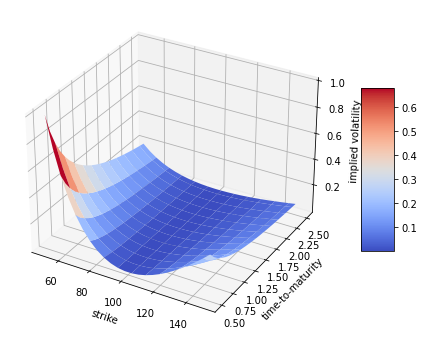

In [6]:
# import the relavend 3D plotting features which is required although
# Axes3D is not directly used
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))

# Set up the canvas for 3D plotting
ax = fig.gca(projection='3d')

# Creates the 3D plot
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                      cmap=plt.cm.coolwarm, linewidth=0.5,
                      antialiased=True)

# Set the x-axis label
ax.set_xlabel('strike')

# Set the y-axis label
ax.set_ylabel('time-to-maturity')

# Set the z-axis label
ax.set_zlabel('implied volatility')

#Creates the colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

### Parameters for the plot_surface()
1. X,Y,Z - Data Values as 2D arrays
2. rstride - Array row stride (step size)
3. cstride - Array column stride (step size)
4. color - Color of the surface patches
5. cmap - Color map for the surface patches
6. facecolors - Face colors for the individual patches
7. norm - Instance of Normalize to mao values to colors
8. vmin - Minimum value to map
9. vmax - Maximum value to map
10. shade - Whether to shade the face colors

As with 2D plots, the line style can be replaced by single points or as in what follows single traingles, plots the same 3D scatter plot but now also with a different viewing angle using the view_init() method

Text(0.5, 0, 'implied volatility')

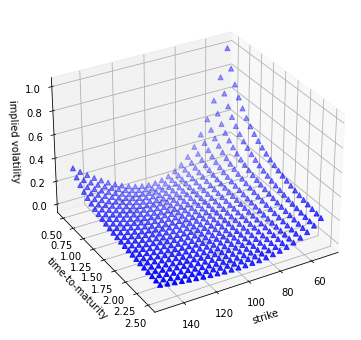

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set the viewing angle
ax.view_init(30, 60)

# Creates the 3D plot
ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')

ax.set_xlabel('strike')

# Set the y-axis label
ax.set_ylabel('time-to-maturity')

# Set the z-axis label
ax.set_zlabel('implied volatility')

# Interactive 2D plotting
Will use Plotly, Cufflinks

In [9]:
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

In [10]:
plyo.init_notebook_mode(connected=True)

In [11]:
# The standard normally distributed pseudo-random numbers
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
# start date for the DatetimeIndex object
#Frequency set to "business daily"
# Mentioned the number of periods needed
index = pd.date_range('2019-1-1', freq='B', periods=len(a))
#Linear transform of the raw data
#Column headers as single characters
#DatetimeIndex object
df = pd.DataFrame(100+5*a, columns=list('abcde'), index=index)

df.head()

,a,b,c,d,e
2019-01-01,100.861455,95.086422,101.133569,105.280836,111.385069
2019-01-02,99.021240,98.481906,101.028318,102.672325,111.823195
2019-01-03,95.733394,99.871881,90.746710,101.036399,116.846848
2019-01-04,90.394050,101.258302,88.494625,105.021647,119.511641
2019-01-07,93.308376,101.585316,83.980658,115.102953,118.642332


Cufflinks adds a new method to the DataFrame class: df.iplot(). This method uses plotly in the backend to create interactive plots. The code examples in this section all make use of the option to download the interactive plot as a static bitmap, which in turn is embedded in the text. In the Jupyter Notebook environment, the created plots are all interactive.

In [12]:
#This makes the use of offline notebook mode capabilities of plotly
# The df.iplot() method is called with parameter as Figure=True to allow for
# local plotting and embedding.
# The image option provides in addition a static bitmap version
# of the plot.
# The filename for the bitmap to be saved is specified
plyo.iplot(df.iplot(asFigure=True),
          image='png',
          filename='ply_01')

As with matplotlib, there are multiple parameters available to customize such plots

In [14]:
plyo.iplot(df[['a', 'b']].iplot(asFigure=True,
                               theme='polar',
                               title='A time series plot',
                               xTitle='date',
                               yTitle='value',
                               mode={'a': 'markers', 'b': 'lines+markers'},
                               symbol={'a':'circle', 'b':'diamond'},
                               size=3.5,
                               colors={'a': 'blue', 'b': 'magenta'}),
                            image='png',
                            filename='ply_02')


Similar to matplotlib, plotly allows for a number of different plotting types. Plot‐ ting types available via Cufflinks are chart, scatter, bar, box, spread, ratio, heat map, surface, histogram, bubble, bubble3d, scatter3d, scattergeo, ohlc, candle, pie, and choropleth. 

In [15]:
plyo.iplot(df.iplot(kind='hist',
                   subplots=True,
                   bins = 15,
                   asFigure=True),
          image='png',
          filename='ply_03')

# Financial Plots
The combination of plotly, Cufflinks, and pandas proves particularly powerful when working with financial time series data. Cufflinks provides specialized func‐ tionality to create typical financial plots and to add typical financial charting ele‐ ments, such as the <b>Relative Strength Index (RSI)</b>, to name but one example. To this end, a persistent <b>QuantFig</b> object is created that can be plotted the same way as a DataFrame object with Cufflinks.

In [17]:
import yfinance as yf

In [28]:
# forex_df = yf.download(tickers = 'EURUSD=X', period='60mo', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [29]:
# forex_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-05,1.116071,1.118443,1.114132,1.116196,1.116196,0
2016-09-06,1.115200,1.125400,1.114455,1.115324,1.115324,0
2016-09-07,1.124859,1.126507,1.123280,1.125366,1.125366,0
2016-09-08,1.124101,1.132999,1.123848,1.124101,1.124101,0
2016-09-09,1.126888,1.128668,1.120600,1.127142,1.127142,0


In [30]:
# forex_df.shape

(1282, 6)

In [31]:
# forex_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,1.179997,1.181195,1.178453,1.179901,1.179901,0
2021-08-31,1.179941,1.184553,1.179649,1.179690,1.179690,0
2021-09-01,1.181195,1.186000,1.179510,1.181028,1.181028,0
2021-09-02,1.184231,1.187225,1.183480,1.184091,1.184091,0
2021-09-03,1.187423,1.190760,1.186817,1.187648,1.187648,0


In [32]:
# forex_df.to_csv('EURUSD.csv')

In [41]:
quotes = pd.read_csv('EURUSD.csv', parse_dates=True, index_col=0)

In [42]:
# we will use only a few last data for visualization
quotes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-05,1.116071,1.118443,1.114132,1.116196,1.116196,0
2016-09-06,1.115200,1.125400,1.114455,1.115324,1.115324,0
2016-09-07,1.124859,1.126507,1.123280,1.125366,1.125366,0
2016-09-08,1.124101,1.132999,1.123848,1.124101,1.124101,0
2016-09-09,1.126888,1.128668,1.120600,1.127142,1.127142,0


In [43]:
quotes = quotes.iloc[-60:]
#OHLV = open high low close
print(quotes.shape)

(60, 6)


During instantiation, the QuantFig object takes the DataFrame object as input and allows for some basic customization. Plotting the data stored in the QuantFig object qf then happens with the qf.iplot()

In [44]:
qf = cf.QuantFig(quotes,
                title='EUR/USD Exchange Rate',
                legend='top',
                name='EUR/USD')
plyo.iplot(qf.iplot(asFigure=True),
          image='png',
          filename='qf_01')

Adding typical financial charting elements, such as Bollinger bands, is possible via different methods available for the QuantFig object

In [45]:
# The number of periods for Bollinger band
# The number of standard deviations to be used for the band width
qf.add_bollinger_bands(periods=15,
                      boll_std=2)
plyo.iplot(qf.iplot(asFigure=True),
          image='png',
          filename='qf_02')

<b>Bollinger Bands</b> are <b>envelopes</b> plotted at a <b>standard deviation level</b> above and below a simple <b>moving average</b> of the price. Bollinger bands help determine whether <u>prices are high or low on a relative basis.</u> They are used in <b>pairs</b>, both upper and lower bands and in conjunction with a moving average.

Certain financial indicators such as RSI, may be added as a subplot

The <b>relative strength index (RSI)</b> is a <b>momentum indicator</b> used in <b>technical analysis</b> that measures the magnitude of recent price changes to evaluate <b>overbought or oversold conditions</b> in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from <b>0 to 100</b>. The indicator was originally developed by J. Welles Wilder Jr. and introduced in his seminal 1978 book, “New Concepts in Technical Trading Systems.”

Traditional interpretation and usage of the RSI are that values of <b>70 or above</b> indicate that a security is becoming <b>overbought or overvalued</b> and may be <u>primed for a trend reversal or corrective pullback in price</u>. An RSI reading of <b>30 or below</b> indicates an <b>oversold or undervalued</b> condition.

In [46]:
qf.add_rsi(periods=14, showbands=False)
plyo.iplot(qf.iplot(asFigure=True),
          image='png',filename='qf_03')